In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "4ULPRtFT3HLt0BkTaiekOIdPT"
Consumer_Secret_Key = "ieBQdKIaEXwbhzTt1zLOWg8iaeCyj4rUrPIIYzjnZwcqel0FN4"
Access_Token = "824737660837076992-fpY3cDgWF0jFDITpUOp0T4s2aBr22uR"
Access_Token_Secret = "nA5rxn944Exzt8xaYcMe4R1tsmxCBzeyRxzpl6SXIWz1R"

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [7]:
posts = api.user_timeline(screen_name="IndosatOoredoo", count = 1000, lang ="en", tweet_mode="extended")

#Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
  print(str(i) +') '+ tweet.full_text + '\n')
  i=i+1

Show the 5 recent tweets:

1) @MoeslihKhaboell Hai Kak Muslih,  mohon maaf atas kendala yg dialami. Utk saat ini kami sedang berupaya agar akses kembali normal ya Kak. Mohon dicek secara berkala. Salam^Lya

2) @gabriellajstne Hai Kak Gabriella, maaf banget buat kendalanya. Terkait paket Freedom internet akan kembali berjalan jika kuota bonusnya sudah habis. Salam^Ayu

3) @MahendraArie Baik, sama sama kak, mohon menunggu atau cek pulsa berkala melalui *123# atau aplikasi MYIM3 ya kak. Salam^Fye

4) @MahendraArie Hi kak Arie, sudah kami informasikan via Dm ya. Salam^Estu

5) @IraRahm86124734 Maaf Kak Ira, yuk bisa restart Hp dulu utk pancing jaringannya lalu coba kembali akses internetnya. Jika masih sama infoin detailnya di https://t.co/GfAYuR1Kso ya Kak, mimin tunggu. Thanks^Marsha.



In [8]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
#Show the first 5 rows of data
df.head()

,Tweets
0,"@MoeslihKhaboell Hai Kak Muslih, mohon maaf a..."
1,"@gabriellajstne Hai Kak Gabriella, maaf banget..."
2,"@MahendraArie Baik, sama sama kak, mohon menun..."
3,"@MahendraArie Hi kak Arie, sudah kami informas..."
4,"@IraRahm86124734 Maaf Kak Ira, yuk bisa restar..."


In [9]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text) #Removing @mentions
  text = re.sub('#', '', text) #Removing '#' hash tag
  text = re.sub('RT[\s]+', '', text) #Removing RT
  text = re.sub('https?:\/\/\S+', '', text) #Removing hyperlink

  return text

#Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Show the cleaned tweets
df

,Tweets
0,"Hai Kak Muslih, mohon maaf atas kendala yg d..."
1,"Hai Kak Gabriella, maaf banget buat kendalany..."
2,"Baik, sama sama kak, mohon menunggu atau cek ..."
3,"Hi kak Arie, sudah kami informasikan via Dm y..."
4,"Maaf Kak Ira, yuk bisa restart Hp dulu utk pa..."
...,...
195,"Hai Kak Alfia, maaf atas hal yg di alami. Apa..."
196,"Baik kak,silakan bisa informasikan lokasi det..."
197,"Hai Kak, detailnya sudah Kami infokan via DM...."
198,"_ter Hi kak Syafei, untuk menu UMB bisa melalu..."


In [10]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"Hai Kak Muslih, mohon maaf atas kendala yg d...",0.65,0.15
1,"Hai Kak Gabriella, maaf banget buat kendalany...",0.00,0.00
2,"Baik, sama sama kak, mohon menunggu atau cek ...",0.00,0.00
3,"Hi kak Arie, sudah kami informasikan via Dm y...",0.00,0.00
4,"Maaf Kak Ira, yuk bisa restart Hp dulu utk pa...",0.00,0.00
...,...,...,...
195,"Hai Kak Alfia, maaf atas hal yg di alami. Apa...",0.00,0.00
196,"Baik kak,silakan bisa informasikan lokasi det...",0.00,0.00
197,"Hai Kak, detailnya sudah Kami infokan via DM....",0.00,0.00
198,"_ter Hi kak Syafei, untuk menu UMB bisa melalu...",0.00,0.00


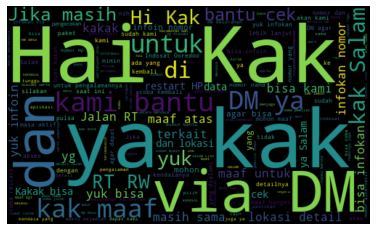

In [11]:
#Word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
#Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):


  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Hai Kak Muslih, mohon maaf atas kendala yg d...",0.65,0.15,Positive
1,"Hai Kak Gabriella, maaf banget buat kendalany...",0.00,0.00,Neutral
2,"Baik, sama sama kak, mohon menunggu atau cek ...",0.00,0.00,Neutral
3,"Hi kak Arie, sudah kami informasikan via Dm y...",0.00,0.00,Neutral
4,"Maaf Kak Ira, yuk bisa restart Hp dulu utk pa...",0.00,0.00,Neutral
...,...,...,...,...
195,"Hai Kak Alfia, maaf atas hal yg di alami. Apa...",0.00,0.00,Neutral
196,"Baik kak,silakan bisa informasikan lokasi det...",0.00,0.00,Neutral
197,"Hai Kak, detailnya sudah Kami infokan via DM....",0.00,0.00,Neutral
198,"_ter Hi kak Syafei, untuk menu UMB bisa melalu...",0.00,0.00,Neutral


In [13]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1)  Hai kak, coba clear cache, stop aplikasi berjalan dan coba kembali. Jika belum bisa yuk infoin via DM 


Nama :
Nomor yang dikeluhkan :
Waktu detail kejadian : (Tanggal dan jam)
Signal Data :
Lokasi detail : 
Nomor Alternatif : 

^Mina



In [14]:
print('Printing Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing Positive tweets:

1)  Hai Kak Muslih,  mohon maaf atas kendala yg dialami. Utk saat ini kami sedang berupaya agar akses kembali normal ya Kak. Mohon dicek secara berkala. Salam^Lya

2)  Hi Miss Aulia, Regarding the eSIM Product That is entered it is not yet available. Thank you for using Indosat's service. Regard^Chun

3) Fueru Album merupakan unlimited &amp; free cloud photo storage, dimana foto dapat diolah menjadi produk berupa photo print, album, kalendar, kartu ucapan, hingga kue.

4) _a_m_i Hai Kak, maaf ya untuk pengalamannya, terkait kendalanya masih dalam penanganan team terkait kak, mohon di tunggu info selanjutnya ya kak. Thanks  ^Vio

5)  Hai kak, maaf untuk pengalamannya ya. Untuk permasalahannya telah kami infokan via DM ya kak. Yuk cek DM kakak kembali :) Salam^Kade

6) _a_m_i Hai kak Tami, mohon maaf untuk kendalanya ya. Saat ini tidak perlu khawatir ya kak karena sudah mimin bantu follow up kan. Mohon ditunggu untuk update selanjutnya ya kak :). Salam ^Una

7)

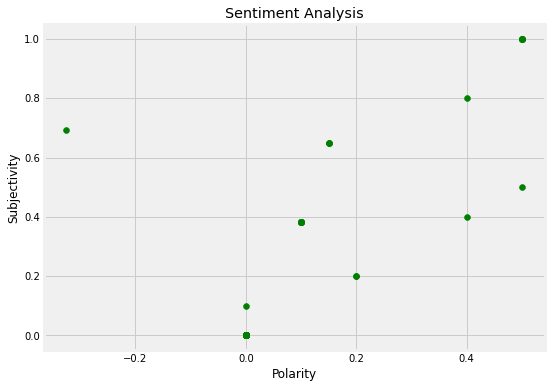

In [15]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Green')
#plt.scatter(x,y,color)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [16]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets ['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100, 1)

11.5

In [17]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets ['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

0.5

In [18]:
#Show the values counts
df['Analysis'].value_counts()

Neutral     176
Positive     23
Negative      1
Name: Analysis, dtype: int64

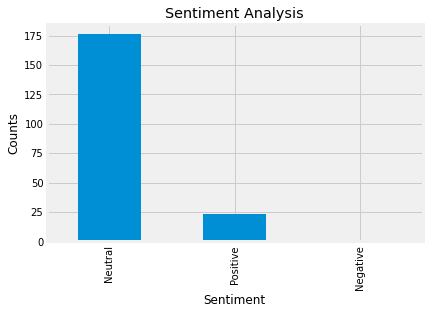

In [19]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

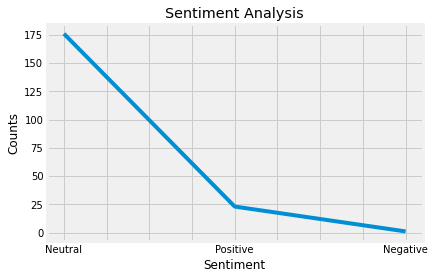

In [20]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()